<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/stocks_svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/googlq.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
df.isnull().sum()

,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0


In [ ]:
df.corr()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
high,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
low,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
open,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN
adjClose,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
adjHigh,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
adjLow,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
adjOpen,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
adjVolume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN


In [ ]:
df=df.drop(['date','volume','adjVolume'],axis=1)

In [ ]:
df

,symbol,close,high,low,open,adjClose,adjHigh,adjLow,adjOpen,divCash,splitFactor
0,GOOG,718.27,722.470,713.1200,716.48,718.27,722.470,713.1200,716.48,0.0,1.0
1,GOOG,718.92,722.980,717.3100,719.00,718.92,722.980,717.3100,719.00,0.0,1.0
2,GOOG,710.36,716.650,703.2600,714.91,710.36,716.650,703.2600,714.91,0.0,1.0
3,GOOG,691.72,708.820,688.4515,708.65,691.72,708.820,688.4515,708.65,0.0,1.0
4,GOOG,693.71,702.480,693.4100,698.77,693.71,702.480,693.4100,698.77,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2466.09,2468.000,2441.0725,2451.32,2466.09,2468.000,2441.0725,2451.32,0.0,1.0
1254,GOOG,2482.85,2494.495,2468.2400,2479.90,2482.85,2494.495,2468.2400,2479.90,0.0,1.0
1255,GOOG,2491.40,2505.000,2487.3300,2499.50,2491.40,2505.000,2487.3300,2499.50,0.0,1.0
1256,GOOG,2521.60,2523.260,2494.0000,2494.01,2521.60,2523.260,2494.0000,2494.01,0.0,1.0


In [ ]:
x=df.drop(['symbol','adjClose'],axis=1)
y=df['adjClose']

<Axes: >

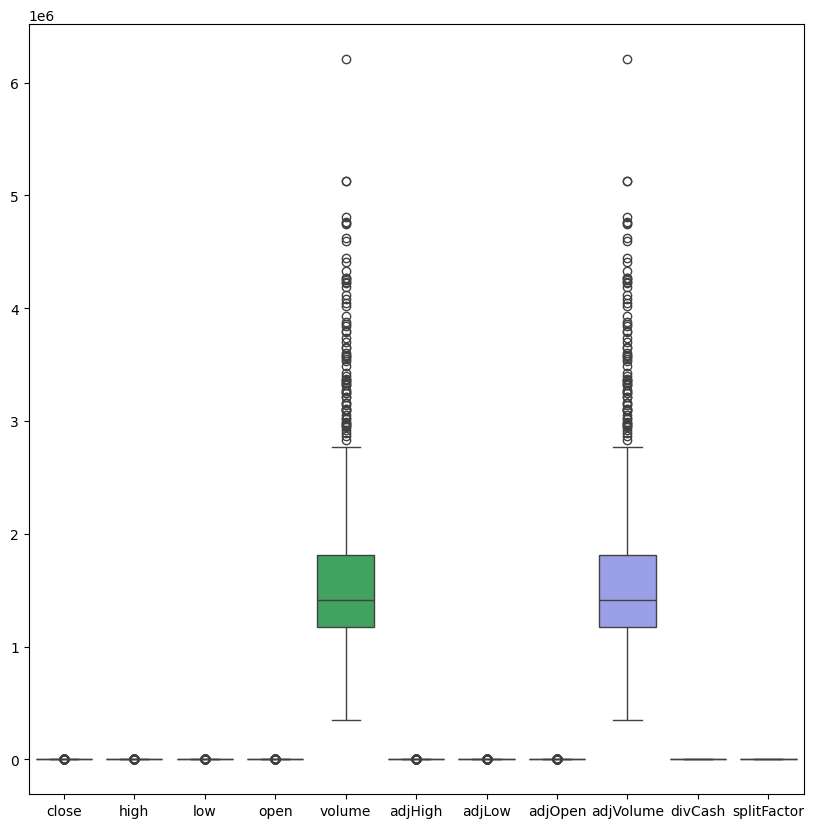

In [ ]:
fig ,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x,ax=ax)

In [ ]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

<Axes: >

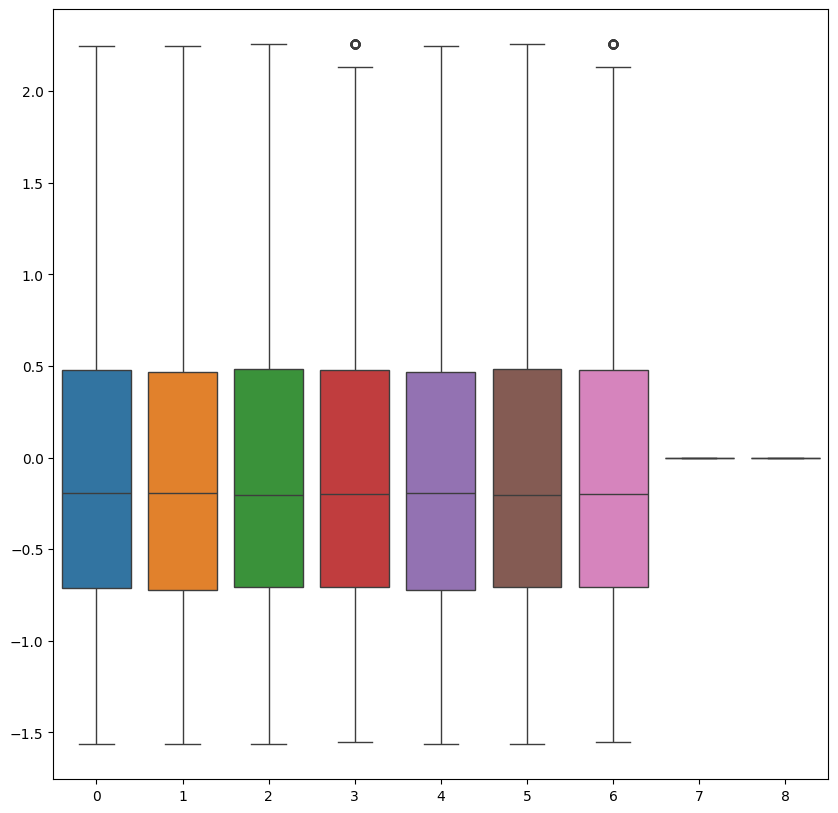

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=x_train_norm, ax=ax)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
svr=SVR()
svr.fit(x_train_norm,y_train)


SVR()

In [ ]:
y_pred=svr.predict(x_test_norm)

In [ ]:
svr.score(x_test_norm,y_test)

0.4948834211669778

In [ ]:
print("Model Performance:")
# Import the necessary metrics from sklearn.metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

Model Performance:
R² Score: 0.4949
MAE: 129.39
MSE: 67026.01


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
svr = SVR()

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'epsilon': [0.01, 0.1, 0.2],  # SVR-specific
    'degree': [2, 3, 4]
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=svr,                   # SVC() or SVR()
    param_distributions=param_dist,    # model-specific
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [ ]:
random_search.fit(x_train_norm, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'epsilon': [0.01, 0.1, 0.2],
                                        'gamma': ['scale', 'auto', 0.01, 0.1],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   random_state=42, verbose=2)

In [ ]:
random_search.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.1, 'degree': 4, 'C': 1}

In [ ]:
svr1=SVR(kernel= 'linear', gamma= 'auto', epsilon= 0.1, degree= 4, C= 1)

In [ ]:
svr1.fit(x_train_norm,y_train)

SVR(C=1, degree=4, gamma='auto', kernel='linear')

In [ ]:
y_pred1=svr1.predict(x_test_norm)

In [ ]:
print("Model Performance:")
# Import the necessary metrics from sklearn.metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R² Score: {r2_score(y_test, y_pred1):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred1):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred1):.2f}")

Model Performance:
R² Score: 0.9623
MAE: 20.39
MSE: 4997.09
